# Desafio Cientista de Dados


### Objetivo: desenvolver um modelo de previsão de preços a partir do dataset oferecido, e avaliar tal modelo utilizando as métricas de avaliação que mais fazem sentido para o problema.

#### Começando importando a lib´s que possivelmente vou precisar

In [383]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#### Importanto o dataset que esta localizado no mesmo endereço que o arquivo atual

In [385]:
db = pd.read_csv("teste_indicium_precificacao.csv")

In [386]:
db

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48889,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48890,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48891,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48892,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


## Vamos começar a limpeza e tratamento dos dados

#### Preenchendo valores NaN na coluna de 'reviews_por_mes' com 0

In [389]:
db['reviews_por_mes'].fillna(0, inplace=True)

### Tratando os erros de digitação na coluna número de reviews, não existe reviews negativos, então multipliquei po -1 para tornarem-se positivos

In [390]:
db['numero_de_reviews'] = db['numero_de_reviews'].apply(lambda x: -x if x < 0 else x)

#### Criando novas colunas usando as colunas  para ajudar no momento de analisar e treinar os modelos

#### Desviz as colunas room type e bairro para criar colunas baseadas nas suas categorias

In [393]:
db_encoded = pd.get_dummies(db, columns=['room_type', 'bairro_group'], drop_first=True)
db_encoded

,id,nome,host_id,host_name,bairro,latitude,longitude,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365,room_type_Private room,room_type_Shared room,bairro_group_Brooklyn,bairro_group_Manhattan,bairro_group_Queens,bairro_group_Staten Island
0,2595,Skylit Midtown Castle,2845,Jennifer,Midtown,40.75362,-73.98377,225,1,45,2019-05-21,0.38,2,355,False,False,False,True,False,False
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Harlem,40.80902,-73.94190,150,3,0,NaN,0.00,1,365,True,False,False,True,False,False
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Clinton Hill,40.68514,-73.95976,89,1,270,2019-07-05,4.64,1,194,False,False,True,False,False,False
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,East Harlem,40.79851,-73.94399,80,10,9,2018-11-19,0.10,1,0,False,False,False,True,False,False
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Murray Hill,40.74767,-73.97500,200,3,74,2019-06-22,0.59,1,129,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48889,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Bedford-Stuyvesant,40.67853,-73.94995,70,2,0,NaN,0.00,2,9,True,False,True,False,False,False
48890,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Bushwick,40.70184,-73.93317,40,4,0,NaN,0.00,2,36,True,False,True,False,False,False
48891,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Harlem,40.81475,-73.94867,115,10,0,NaN,0.00,1,27,False,False,False,True,False,False
48892,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Hell's Kitchen,40.75751,-73.99112,55,1,0,NaN,0.00,6,2,False,True,False,True,False,False


### Separando as features (X) da variável alvo (y), a nossa variável a ser estudada é o preço, ou seja, a coluna price.

In [395]:
colunas_remover = ['price', 'nome', 'host_id', 'host_name', 'bairro', 'ultima_review']
x = db_encoded.drop(columns=colunas_remover)
y = db_encoded['price']
x

,id,latitude,longitude,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365,room_type_Private room,room_type_Shared room,bairro_group_Brooklyn,bairro_group_Manhattan,bairro_group_Queens,bairro_group_Staten Island
0,2595,40.75362,-73.98377,1,45,0.38,2,355,False,False,False,True,False,False
1,3647,40.80902,-73.94190,3,0,0.00,1,365,True,False,False,True,False,False
2,3831,40.68514,-73.95976,1,270,4.64,1,194,False,False,True,False,False,False
3,5022,40.79851,-73.94399,10,9,0.10,1,0,False,False,False,True,False,False
4,5099,40.74767,-73.97500,3,74,0.59,1,129,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48889,36484665,40.67853,-73.94995,2,0,0.00,2,9,True,False,True,False,False,False
48890,36485057,40.70184,-73.93317,4,0,0.00,2,36,True,False,True,False,False,False
48891,36485431,40.81475,-73.94867,10,0,0.00,1,27,False,False,False,True,False,False
48892,36485609,40.75751,-73.99112,1,0,0.00,6,2,False,True,False,True,False,False


In [396]:
y

0        225
1        150
2         89
3         80
4        200
        ... 
48889     70
48890     40
48891    115
48892     55
48893     90
Name: price, Length: 48894, dtype: int64

### Dividindo em treino (80%) e teste (20%)

In [398]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Inicializando o modelo de Regressão Linear

In [400]:
model = LinearRegression()

### Treinando o modelo

In [402]:
model.fit(X_train, y_train)

LinearRegression()

### Fazendo previsões no conjunto de teste

In [404]:
y_pred = model.predict(X_test)

In [405]:
y_pred

array([135.01404164, 104.02879958, 132.4954178 , ..., 238.30040136,
       158.78863424, 158.47993215])

### Calculando métricas de avaliação

In [407]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

### Exibindo os resultados

In [409]:
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R²: {r2}')

RMSE: 211.63705063448006
MAE: 69.84861288968163
R²: 0.1025091588365481


### Análise Descritiva

In [411]:
print("Análise Estatística Descritiva:")
print(db.describe())

Análise Estatística Descritiva:
                 id       host_id      latitude     longitude         price  \
count  4.889400e+04  4.889400e+04  48894.000000  48894.000000  48894.000000   
mean   1.901753e+07  6.762139e+07     40.728951    -73.952169    152.720763   
std    1.098288e+07  7.861118e+07      0.054529      0.046157    240.156625   
min    2.595000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.472371e+06  7.822737e+06     40.690100    -73.983070     69.000000   
50%    1.967743e+07  3.079553e+07     40.723075    -73.955680    106.000000   
75%    2.915225e+07  1.074344e+08     40.763117    -73.936273    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimo_noites  numero_de_reviews  reviews_por_mes  \
count   48894.000000       48894.000000     48894.000000   
mean        7.030085          23.274758         1.090928   
std        20.510741          44.550991         1.597294   
min         1.00

In [412]:
print("\nAnálise de Valores Faltantes:")
print(db.isnull().sum())


Análise de Valores Faltantes:
id                                   0
nome                                16
host_id                              0
host_name                           21
bairro_group                         0
bairro                               0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimo_noites                        0
numero_de_reviews                    0
ultima_review                    10052
reviews_por_mes                      0
calculado_host_listings_count        0
disponibilidade_365                  0
dtype: int64


### 1. Distribuição de preços (Histograma)

C:\Users\marco\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


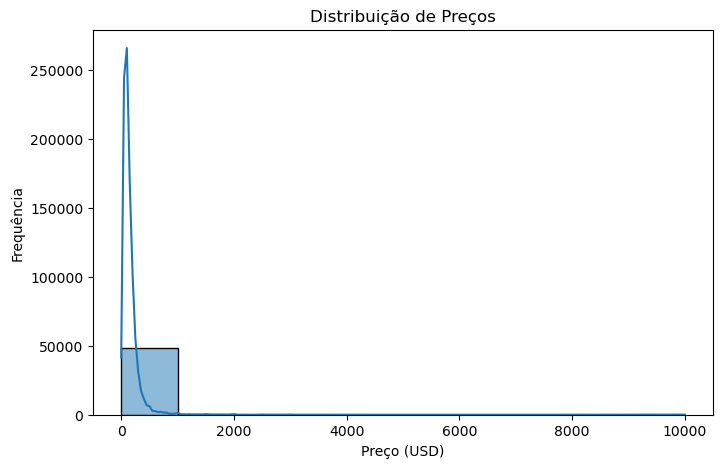

In [414]:
plt.figure(figsize=(8,5))
sns.histplot(db['price'], kde=True, bins=10)
plt.title('Distribuição de Preços')
plt.xlabel('Preço (USD)')
plt.ylabel('Frequência')
plt.show()

### 2. Boxplot: Preços por tipo de quarto

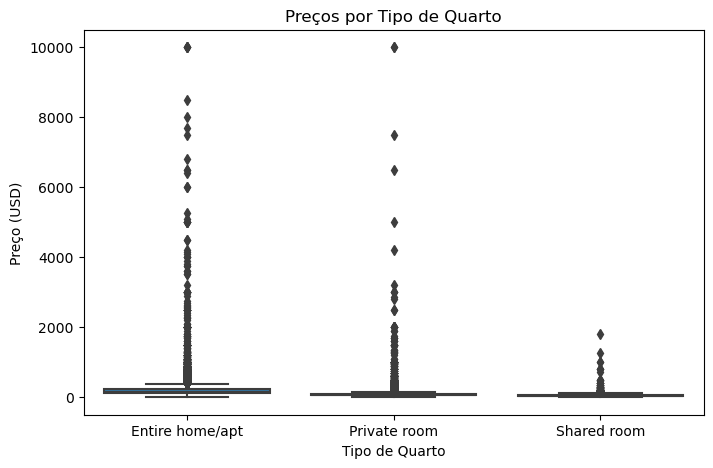

In [416]:
plt.figure(figsize=(8,5))
sns.boxplot(x='room_type', y='price', data=db)
plt.title('Preços por Tipo de Quarto')
plt.xlabel('Tipo de Quarto')
plt.ylabel('Preço (USD)')
plt.show()

### 3. Boxplot: Preços por Bairro

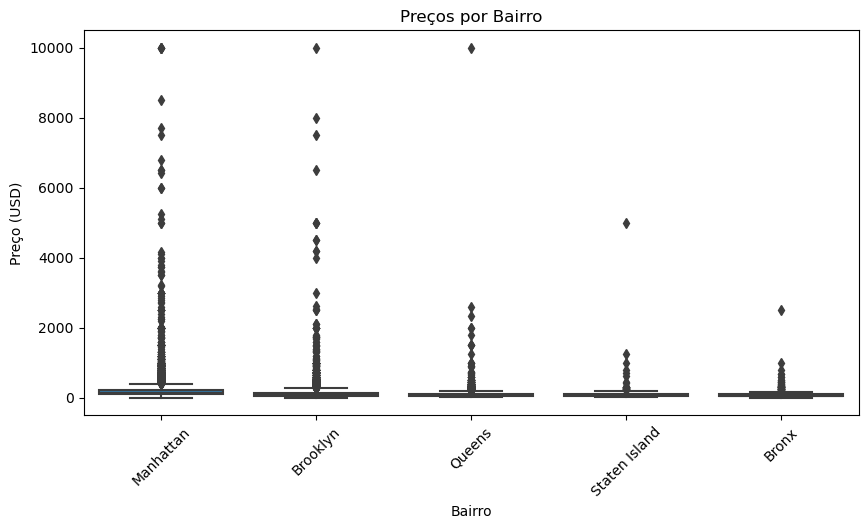

In [418]:
plt.figure(figsize=(10,5))
sns.boxplot(x='bairro_group', y='price', data=db)
plt.title('Preços por Bairro')
plt.xlabel('Bairro')
plt.ylabel('Preço (USD)')
plt.xticks(rotation=45)
plt.show()

### 4. Scatterplot: Preço vs. Número de Reviews

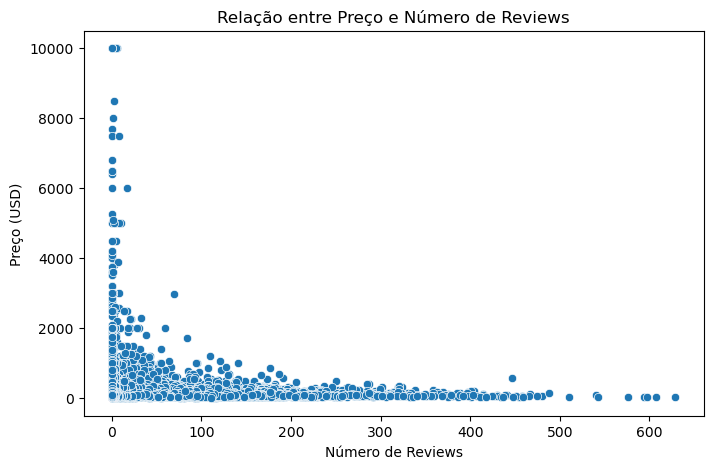

In [420]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='numero_de_reviews', y='price', data=db)
plt.title('Relação entre Preço e Número de Reviews')
plt.xlabel('Número de Reviews')
plt.ylabel('Preço (USD)')
plt.show()

### 5. Scatterplot: Preço vs. Disponibilidade

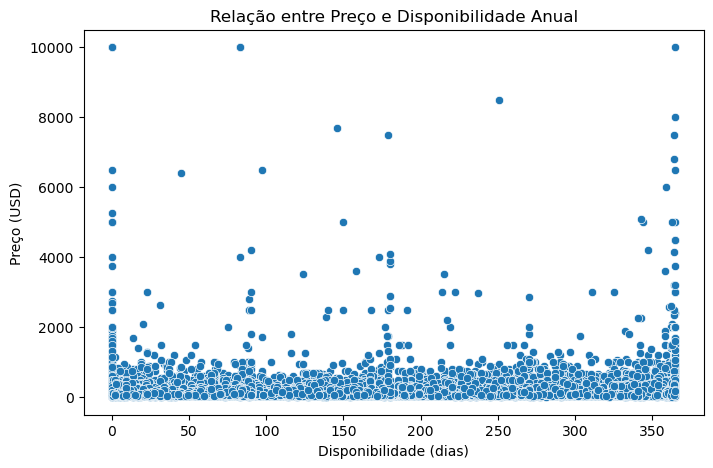

In [422]:

plt.figure(figsize=(8,5))
sns.scatterplot(x='disponibilidade_365', y='price', data=db)
plt.title('Relação entre Preço e Disponibilidade Anual')
plt.xlabel('Disponibilidade (dias)')
plt.ylabel('Preço (USD)')
plt.show()

### Calculando o preço médio por bairro

In [424]:
preco_medio_bairro = db.groupby('bairro_group')['price'].mean().sort_values(ascending=False)
print(preco_medio_bairro)

bairro_group
Manhattan        196.875814
Brooklyn         124.381983
Staten Island    114.812332
Queens            99.517649
Bronx             87.496792
Name: price, dtype: float64


### Visualização: Preço médio por bairro

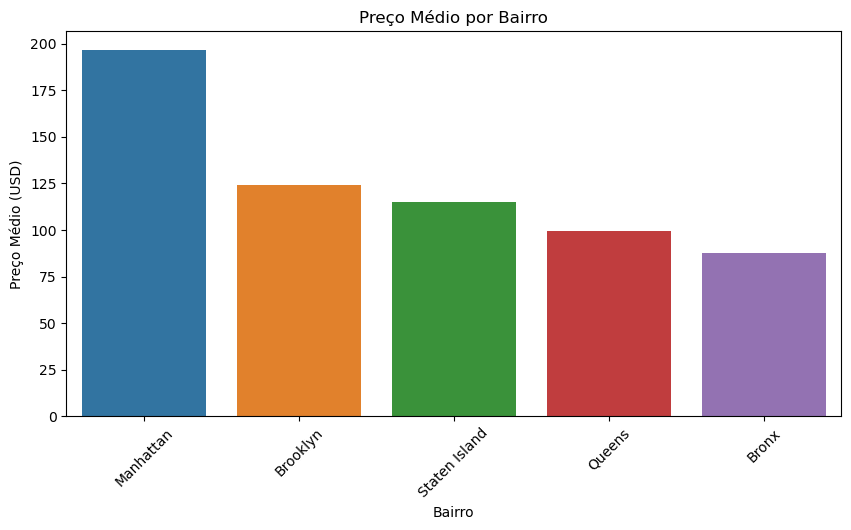

In [426]:
plt.figure(figsize=(10,5))
sns.barplot(x=preco_medio_bairro.index, y=preco_medio_bairro.values)
plt.title('Preço Médio por Bairro')
plt.xlabel('Bairro')
plt.ylabel('Preço Médio (USD)')
plt.xticks(rotation=45)
plt.show()

### Número médio de reviews por bairro

In [428]:
reviews_bairro = db.groupby('bairro_group')['numero_de_reviews'].mean().sort_values(ascending=False)
print(reviews_bairro)

bairro_group
Staten Island    30.941019
Queens           27.700318
Bronx            26.004583
Brooklyn         24.203601
Manhattan        20.985596
Name: numero_de_reviews, dtype: float64


### Visualização: Número médio de reviews por bairro

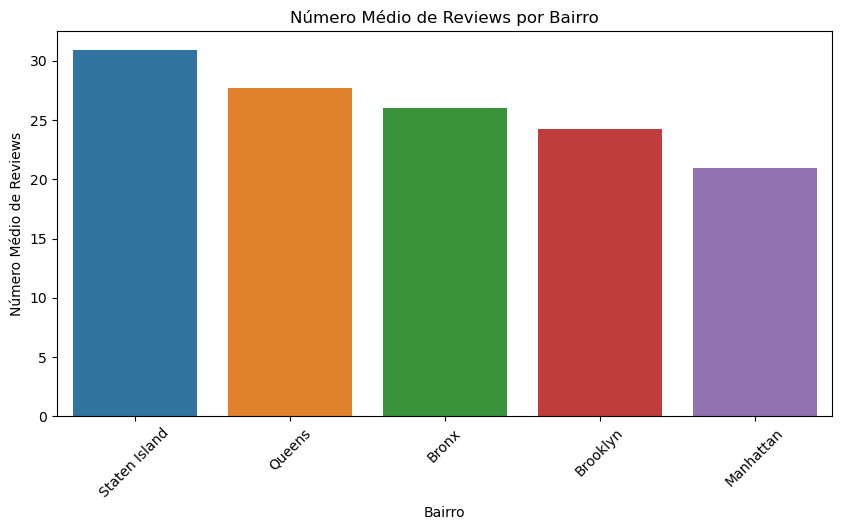

In [430]:
plt.figure(figsize=(10,5))
sns.barplot(x=reviews_bairro.index, y=reviews_bairro.values)
plt.title('Número Médio de Reviews por Bairro')
plt.xlabel('Bairro')
plt.ylabel('Número Médio de Reviews')
plt.xticks(rotation=45)
plt.show()


### Correlação entre preço, disponibilidade e mínimo de noites

In [432]:
corr = db[['price', 'disponibilidade_365']].corr()
print(corr)

                        price  disponibilidade_365
price                1.000000             0.081833
disponibilidade_365  0.081833             1.000000


#### Começando a analise de palavras que mais aparecem usando o wordcloud(nuvem de palavras)

##### Lembra-se de installar primeiro a lib, use conda install -c conda-forge wordcloud, não esqueça de ativar o ambiente primeiro

In [435]:
from wordcloud import WordCloud

### Substituir valores NaN por strings vazias e converter todos os itens para string

In [437]:
def plot_wordcloud(column):
    text = " ".join(str(review) for review in column.fillna(''))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

### Gerando a nuvem de palavras para os nomes dos locais

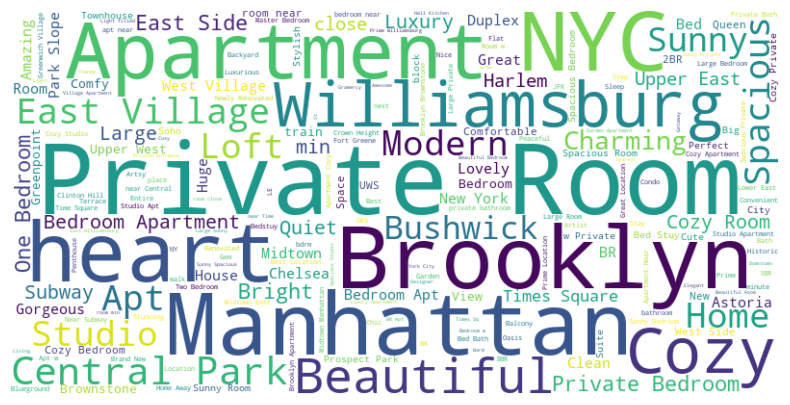

In [439]:
plot_wordcloud(db['nome'])

### Extraindo palavras dos nomes dos locais

In [441]:
db['palavras'] = db['nome'].str.split()

### Expandindo e analisando a frequência de palavras associadas ao preço

In [443]:
palavras_precos = db.explode('palavras').groupby('palavras')['price'].mean().sort_values(ascending=False)
print(palavras_precos.head(10))

palavras
-stunning            10000.0
Manhattans            9999.0
flat-TriBeCa/Soho     8500.0
MotorYacht            7500.0
70'                   7500.0
daylight              6800.0
Kitchens              6500.0
(Gramacy              5100.0
50P                   5000.0
11211                 5000.0
Name: price, dtype: float64


## Durante a análise exploratória, foram levantadas as seguintes hipóteses de negócio:

#### Localização Impacta o Preço: Apartamentos localizados em áreas centrais, como Manhattan, tendem a ser mais caros.
#### Número de Noites Mínimas e Disponibilidade: Apartamentos com alta disponibilidade ao longo do ano e poucas noites mínimas tendem a ter preços maiores.
#### Textos e Descrições de Propriedades: Propriedades de alto valor geralmente têm descrições mais elaboradas e sofisticadas.


## Começando com as previsões

### Todos os arquivos estão sendo criados e importados usando o pickle

### Escalonamento

In [447]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
db[['numero_de_reviews', 'disponibilidade_365', 'minimo_noites']] = scaler.fit_transform(db[['numero_de_reviews', 'disponibilidade_365', 'minimo_noites']])
with open("scaler.pkl", "wb") as arquivo:
    pickle.dump(scaler, arquivo)

### Implementação uso da regressão linear

In [449]:
model = LinearRegression()
model.fit(X_train, y_train)
import pickle

with open("model_LR.pkl", "wb") as arquivo:
    pickle.dump(model, arquivo)

### Implementação uso da árvore de decisão

In [451]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
import pickle

with open("model_DTR.pkl", "wb") as arquivo:
    pickle.dump(model, arquivo)

### Implementação do Random Forest

In [453]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)
import pickle

with open("model_RFR.pkl", "wb") as arquivo:
    pickle.dump(model, arquivo)

### Implementação do XGBoost

In [455]:
import xgboost as xgb
model = xgb.XGBRegressor()
model.fit(X_train, y_train)
import pickle

with open("model_XBGR.pkl", "wb") as arquivo:
    pickle.dump(model, arquivo)

### Calculando o MAE

In [457]:
from sklearn.metrics import mean_absolute_error
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae}")


MAE: 66.91790055346667


### Calculando o MSE e RMSE

In [459]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"MSE: {mse}, RMSE: {rmse}")


MSE: 48369.97358847878, RMSE: 219.93174756837354


In [460]:
novo_apartamento = {'bairro_group': 'Manhattan',
                    'room_type': 'Entire home/apt',
                    'minimo_noites': 1,
                    'numero_de_reviews': 45,
                    'disponibilidade_365': 355}

### Transformando o input em um DataFrame

In [462]:
novo_apartamento_db = pd.DataFrame([novo_apartamento])

### Aplicando One-Hot Encoding nas variáveis categóricas

In [464]:
novo_apartamento_db = pd.get_dummies(novo_apartamento_db, columns=['bairro_group', 'room_type'])

### Certificando-se de que as colunas de categorias estão alinhadas com o modelo treinado
### (Você deve garantir que todas as categorias do treino estão presentes no teste)

In [466]:
colunas_treino = ['id','latitude','longitude','minimo_noites','numero_de_reviews','reviews_por_mes','calculado_host_listings_count','disponibilidade_365','room_type_Private room','room_type_Shared room','bairro_group_Brooklyn','bairro_group_Manhattan','bairro_group_Queens','bairro_group_Staten Island'] 

### As mesmas colunas usadas no treinamento

In [468]:
novo_apartamento_db = novo_apartamento_db.reindex(columns=colunas_treino, fill_value=0)

### Aplicar a normalização/escala para variáveis numéricas como no treino (ex: StandardScaler)

In [470]:
import pickle
from sklearn.preprocessing import StandardScaler

### Carregar o scaler treinado anteriormente

In [472]:
with open('scaler.pkl', 'rb') as arquivo_scaler:  # Coloque o caminho correto para o seu scaler
    scaler = pickle.load(arquivo_scaler)

### Aplicar o scaler nas variáveis numéricas

In [474]:
novo_apartamento_db[['numero_de_reviews', 'disponibilidade_365', 'minimo_noites']] = scaler.transform(
    novo_apartamento_db[['numero_de_reviews', 'disponibilidade_365', 'minimo_noites']]
)

### Carregar o modelo treinado, cuidado com o caminho dos arquivos contendo os modelos, deixei na mesma pasta que o projeto.

In [476]:
with open('model_RFR.pkl', 'rb') as arquivo_modelo:  
    modelo1 = pickle.load(arquivo_modelo)

with open('model_DTR.pkl', 'rb') as arquivo_modelo:  
    modelo2 = pickle.load(arquivo_modelo)
                         
with open('model_LR.pkl', 'rb') as arquivo_modelo:  
    modelo3 = pickle.load(arquivo_modelo)

with open('model_XBGR.pkl', 'rb') as arquivo_modelo:  
    modelo4 = pickle.load(arquivo_modelo)

### Fazer a previsão

In [478]:
preco_sugerido1 = modelo1.predict(novo_apartamento_db)
preco_sugerido2 = modelo2.predict(novo_apartamento_db)
preco_sugerido3 = modelo3.predict(novo_apartamento_db)
preco_sugerido4 = modelo4.predict(novo_apartamento_db)

### Mostrando a previsão usando os 4 modelos

In [480]:
print(f"Preço sugerido Modelo 1: ${preco_sugerido1[0]:.2f}")
print(f"Preço sugerido Modelo 2: ${preco_sugerido2[0]:.2f}")
print(f"Preço sugerido Modelo 3: ${preco_sugerido3[0]:.2f}")
print(f"Preço sugerido Modelo 4: ${preco_sugerido4[0]:.2f}")

Preço sugerido Modelo 1: $331.70
Preço sugerido Modelo 2: $425.00
Preço sugerido Modelo 3: $-31092.23
Preço sugerido Modelo 4: $323.87


In [481]:
print("Modelo mais adequado Com base nas características dos dados (múltiplas variáveis categóricas e numéricas) e a necessidade de um modelo que capture relações complexas, como a localização (latitude/longitude) e o tipo de quarto, o Gradient Boosting Regressor (O quarto modelo) é provavelmente a escolha mais indicada. Ele oferece flexibilidade para modelar interações não lineares entre as variáveis e costuma apresentar um bom desempenho em problemas de regressão com dados tabulares. Embora o Random Forest Regressor(primeiro modelo) seria uma ótima escolha, com uma ligeira perda de performance em comparação ao Gradient Boosting.")

Modelo mais adequado Com base nas características dos dados (múltiplas variáveis categóricas e numéricas) e a necessidade de um modelo que capture relações complexas, como a localização (latitude/longitude) e o tipo de quarto, o Gradient Boosting Regressor (O quarto modelo) é provavelmente a escolha mais indicada. Ele oferece flexibilidade para modelar interações não lineares entre as variáveis e costuma apresentar um bom desempenho em problemas de regressão com dados tabulares. Embora o Random Forest Regressor(primeiro modelo) seria uma ótima escolha, com uma ligeira perda de performance em comparação ao Gradient Boosting.
